In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/CSV_Files/cleaned_df2.csv')

In [3]:
df

,Unnamed: 0,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,0,3.250,3.580000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,1,4.000,3.440000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,2,6.450,2.411028,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3,3.625,2.130000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,4,2.875,2.480000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,1833,3.450,2.460000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,1834,2.600,2.270000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,1835,4.000,4.160000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,1836,2.875,2.060000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [4]:
cols_drop = ['Unnamed: 0']

In [5]:
df.drop(columns=cols_drop, inplace=True)

In [6]:
df

,Coupon,Yield,Moody's Rating,Names,Ticker,Weight (%),Price,Shares,Market Value,Notional Value,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,A3,aflac inc,AFL,0.12,52.81,543134.0,28682906.54,28682906.54,...,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,Baa1,ebay inc,EBAY,0.09,38.14,575844.0,21962690.16,21962690.16,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [7]:
df.isna().sum()

Coupon                            0
Yield                             0
Moody's Rating                    0
Names                             0
Ticker                            0
Weight (%)                        0
Price                             0
Shares                            0
Market Value                      0
Notional Value                    0
Sector                            0
Exchange                          0
Market Cap (intraday) 5           0
Trailing P/E                      0
Forward P/E 1                     0
PEG Ratio (5 yr expected) 1       0
Price/Sales (ttm)                 0
Price/Book (mrq)                  0
Beta (5Y Monthly)                 0
% Held by Insiders 1              0
% Held by Institutions 1          0
Avg Vol (10 day) 3                0
Avg Vol (3 month) 3               0
Shares Outstanding 5              0
Profit Margin                     0
Operating Margin (ttm)            0
Return on Assets (ttm)            0
Revenue Per Share (ttm)     

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 33 columns):
Coupon                            1838 non-null float64
Yield                             1838 non-null float64
Moody's Rating                    1838 non-null object
Names                             1838 non-null object
Ticker                            1838 non-null object
Weight (%)                        1838 non-null float64
Price                             1838 non-null float64
Shares                            1838 non-null float64
Market Value                      1838 non-null float64
Notional Value                    1838 non-null float64
Sector                            1838 non-null object
Exchange                          1838 non-null object
Market Cap (intraday) 5           1838 non-null float64
Trailing P/E                      1838 non-null float64
Forward P/E 1                     1838 non-null float64
PEG Ratio (5 yr expected) 1       1838 non-null float64
Pr

In [9]:
names_drop = ["Names", "Ticker"]

In [10]:
df.drop(columns=names_drop, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 31 columns):
Coupon                            1838 non-null float64
Yield                             1838 non-null float64
Moody's Rating                    1838 non-null object
Weight (%)                        1838 non-null float64
Price                             1838 non-null float64
Shares                            1838 non-null float64
Market Value                      1838 non-null float64
Notional Value                    1838 non-null float64
Sector                            1838 non-null object
Exchange                          1838 non-null object
Market Cap (intraday) 5           1838 non-null float64
Trailing P/E                      1838 non-null float64
Forward P/E 1                     1838 non-null float64
PEG Ratio (5 yr expected) 1       1838 non-null float64
Price/Sales (ttm)                 1838 non-null float64
Price/Book (mrq)                  1838 non-null float64


In [12]:
pd.get_dummies(df, dummy_na=True)

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,...,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,...,0,0,0,0,0,0,0,0,1,0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,...,0,0,0,0,0,0,0,0,1,0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,...,0,0,0,0,0,0,0,0,1,0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,...,0,0,0,0,0,0,0,0,1,0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,...,0,0,0,0,0,0,0,1,0,0
1834,2.600,2.270000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,...,0,0,0,0,0,0,0,1,0,0
1835,4.000,4.160000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,...,0,0,0,0,0,0,0,1,0,0
1836,2.875,2.060000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,...,0,0,0,0,0,0,0,1,0,0


In [13]:
pd.set_option('display.max_columns', 500)

In [14]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [15]:
mdf = df[["Moody's Rating"]]

In [16]:
mdf

,Moody's Rating
0,A3
1,A3
2,A3
3,A3
4,A3
...,...
1833,Baa1
1834,Baa1
1835,Baa1
1836,Baa1


In [17]:
moods = df["Moody's Rating"]

In [18]:
moods = list(moods)

In [19]:
ndf = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/Models/names_df.csv')

In [20]:
ndf

,Unnamed: 0,Names,Ticker
0,0,aflac inc,AFL
1,1,aflac inc,AFL
2,2,aflac inc,AFL
3,3,aflac inc,AFL
4,4,aflac inc,AFL
...,...,...,...
1833,1833,ebay inc,EBAY
1834,1834,ebay inc,EBAY
1835,1835,ebay inc,EBAY
1836,1836,ebay inc,EBAY


In [21]:
ndf.drop(columns=cols_drop, inplace=True)

In [22]:
ndf

,Names,Ticker
0,aflac inc,AFL
1,aflac inc,AFL
2,aflac inc,AFL
3,aflac inc,AFL
4,aflac inc,AFL
...,...,...
1833,ebay inc,EBAY
1834,ebay inc,EBAY
1835,ebay inc,EBAY
1836,ebay inc,EBAY


In [23]:
nmdf = pd.concat([mdf, ndf], axis=1)

In [24]:
nmdf

,Moody's Rating,Names,Ticker
0,A3,aflac inc,AFL
1,A3,aflac inc,AFL
2,A3,aflac inc,AFL
3,A3,aflac inc,AFL
4,A3,aflac inc,AFL
...,...,...,...
1833,Baa1,ebay inc,EBAY
1834,Baa1,ebay inc,EBAY
1835,Baa1,ebay inc,EBAY
1836,Baa1,ebay inc,EBAY


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 31 columns):
Coupon                            1838 non-null float64
Yield                             1838 non-null float64
Moody's Rating                    1838 non-null object
Weight (%)                        1838 non-null float64
Price                             1838 non-null float64
Shares                            1838 non-null float64
Market Value                      1838 non-null float64
Notional Value                    1838 non-null float64
Sector                            1838 non-null object
Exchange                          1838 non-null object
Market Cap (intraday) 5           1838 non-null float64
Trailing P/E                      1838 non-null float64
Forward P/E 1                     1838 non-null float64
PEG Ratio (5 yr expected) 1       1838 non-null float64
Price/Sales (ttm)                 1838 non-null float64
Price/Book (mrq)                  1838 non-null float64


In [26]:
y = df["Moody's Rating"]

In [27]:
X = df.drop("Moody's Rating", axis=1)

In [28]:
X

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [29]:
X = pd.get_dummies(X, dummy_na=True)

In [30]:
X

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
0,3.250,3.580000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,4.000,3.440000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,6.450,2.411028,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3.625,2.130000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.875,2.480000,0.12,52.81,543134.0,28682906.54,28682906.54,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1834,2.600,2.270000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1835,4.000,4.160000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1836,2.875,2.060000,0.09,38.14,575844.0,21962690.16,21962690.16,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 43 columns):
Coupon                                   1838 non-null float64
Yield                                    1838 non-null float64
Weight (%)                               1838 non-null float64
Price                                    1838 non-null float64
Shares                                   1838 non-null float64
Market Value                             1838 non-null float64
Notional Value                           1838 non-null float64
Market Cap (intraday) 5                  1838 non-null float64
Trailing P/E                             1838 non-null float64
Forward P/E 1                            1838 non-null float64
PEG Ratio (5 yr expected) 1              1838 non-null float64
Price/Sales (ttm)                        1838 non-null float64
Price/Book (mrq)                         1838 non-null float64
Beta (5Y Monthly)                        1838 non-null float64
% Held by I

In [32]:
X.dtypes

Coupon                                   float64
Yield                                    float64
Weight (%)                               float64
Price                                    float64
Shares                                   float64
Market Value                             float64
Notional Value                           float64
Market Cap (intraday) 5                  float64
Trailing P/E                             float64
Forward P/E 1                            float64
PEG Ratio (5 yr expected) 1              float64
Price/Sales (ttm)                        float64
Price/Book (mrq)                         float64
Beta (5Y Monthly)                        float64
% Held by Insiders 1                     float64
% Held by Institutions 1                 float64
Avg Vol (10 day) 3                       float64
Avg Vol (3 month) 3                      float64
Shares Outstanding 5                     float64
Profit Margin                            float64
Operating Margin (tt

In [33]:
data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                    test_size = 0.25, random_state=123)

In [34]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
# Feature importance
tree_clf.feature_importances_

array([0.03247115, 0.00781736, 0.10813215, 0.        , 0.        ,
       0.        , 0.        , 0.07850234, 0.17084282, 0.        ,
       0.11291103, 0.0383612 , 0.        , 0.        , 0.        ,
       0.00306577, 0.        , 0.07518057, 0.10288107, 0.        ,
       0.09585797, 0.        , 0.05269877, 0.        , 0.        ,
       0.11512463, 0.        , 0.00308742, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00306577, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

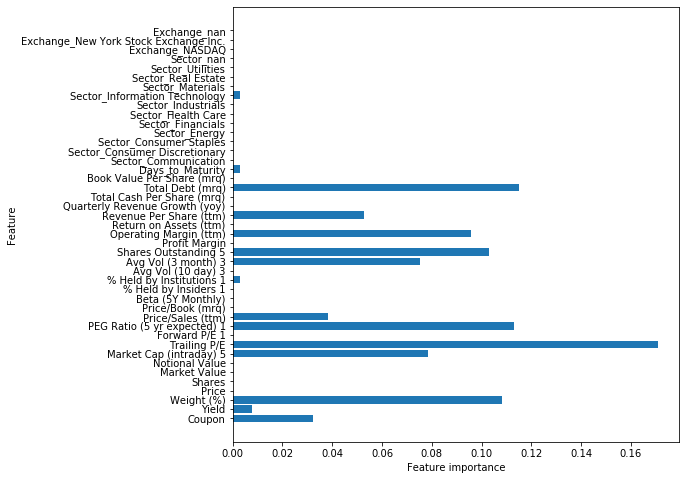

In [36]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [37]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred, labels=np.unique(target_test)))
print(classification_report(target_test, pred, labels=np.unique(target_test)))

[[32  0  0  0  0  0  0  0  0  0  0 12  0  0  0]
 [ 9 27  1  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 7  1 37  0  0  0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  4  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 5  3  0  0  0  0  0  0  0  0  0 89  2  0  0]
 [18  0 10  0  0  0  0  0  0  0  0 25 19  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 32  0  0  0]
 [ 7  3  3  0  0  0  1  0  0  0  0 21  2  0  1]]
              precision    recall  f1-score   support

          A1       0.38      0.73      0.50        44
          A2       0.79      0.59      0.68        46
          A3       0.73      0.48      0.58        77
         Aa1       1.00      0.80      0.89        10
        

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
pred

array(['A1', 'A1', 'Baa1', 'Baa1', 'A3', 'A1', 'A1', 'Baa1', 'Baa1',
       'Baa1', 'Baa1', 'Baa1', 'Baa1', 'A3', 'Baa1', 'A1', 'A1', 'A2',
       'A3', 'A1', 'A1', 'Baa1', 'Baa1', 'A1', 'Baa1', 'Baa1', 'A1', 'A1',
       'A3', 'Baa1', 'Baa2', 'Baa1', 'Baa1', 'Baa1', 'A3', 'A1', 'A2',
       'Baa1', 'Baa1', 'A3', 'Baa1', 'Baa1', 'Baa2', 'A1', 'Baa1', 'Baa1',
       'Baa1', 'A1', 'Baa1', 'Aa2', 'Baa1', 'Baa1', 'Baa1', 'Baa1',
       'Baa1', 'Baa1', 'Baa1', 'A3', 'Baa2', 'Baa1', 'Baa1', 'Baa1',
       'Baa2', 'A1', 'Baa1', 'A3', 'A3', 'A1', 'A2', 'A3', 'A2', 'Baa1',
       'A3', 'Baa1', 'Baa1', 'Baa1', 'A2', 'A1', 'Aa1', 'Baa1', 'Baa1',
       'Aa2', 'Aa1', 'Baa1', 'Baa1', 'Baa1', 'Baa1', 'Baa1', 'Aaa',
       'Baa1', 'A1', 'Baa1', 'Baa1', 'Baa1', 'Baa1', 'Baa1', 'A2', 'Baa1',
       'A1', 'Baa1', 'Baa1', 'Baa2', 'Baa1', 'B2', 'A1', 'A3', 'Baa1',
       'A1', 'Baa1', 'Baa1', 'Baa1', 'A1', 'Baa1', 'Baa1', 'Baa1', 'Baa1',
       'A3', 'A3', 'A1', 'Baa1', 'Baa2', 'Baa1', 'A1', 'A2', 'Aa2',


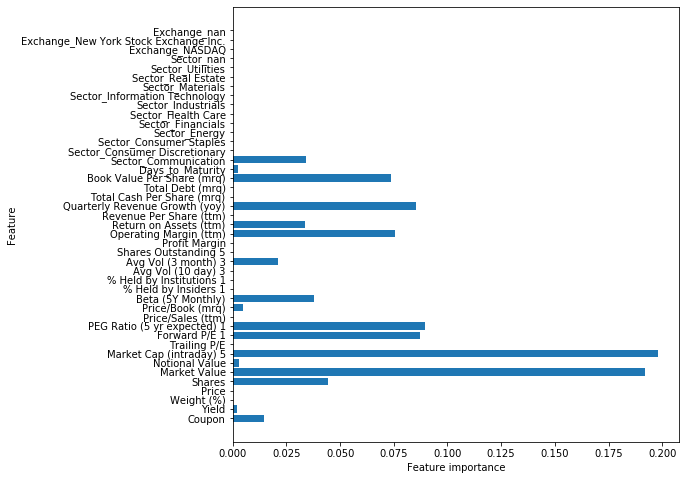

In [39]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 
tree_clf.fit(data_train, target_train)

tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [40]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[24  0  5  0  0  0  0  0  0  0  0 15  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  2 40  0  0  0  0  0  0  0  0 29  6  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  4  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  2  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0 87  0  8  0]
 [ 0  0 14  0  0  0  0  0  0  0  0 23 28  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  2 15  0]
 [ 0  3  6  0  0  0  1  0  0  0  1 18  4  4  1]]
              precision    recall  f1-score   support

          A1       1.00      0.55      0.71        44
          A2       0.76      0.61      0.67        46
          A3       0.62      0.52      0.56        77
         Aa1       1.00      1.00      1.00        10
        

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


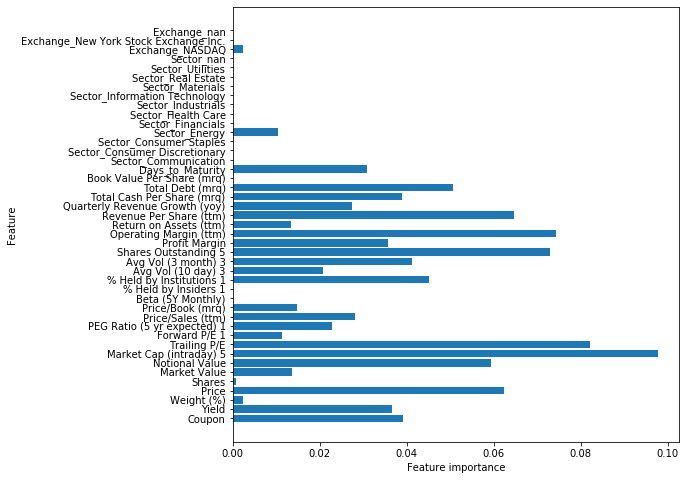

In [41]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10) 
tree_clf.fit(data_train, target_train)

tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [42]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 44  1  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1 73  0  0  0  0  0  0  0  0  1  2  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  4  0  0  3  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0 96  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  1  3 53  2  3]
 [ 0  0  2  0  0  0  0  0  0  0  0  8  2 20  1]
 [ 1  4  4  0  0  0  1  0  0  0  1 11  6  1  9]]
              precision    recall  f1-score   support

          A1       0.98      1.00      0.99        44
          A2       0.83      0.96      0.89        46
          A3       0.78      0.95      0.86        77
         Aa1       1.00      0.90      0.95        10
        

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


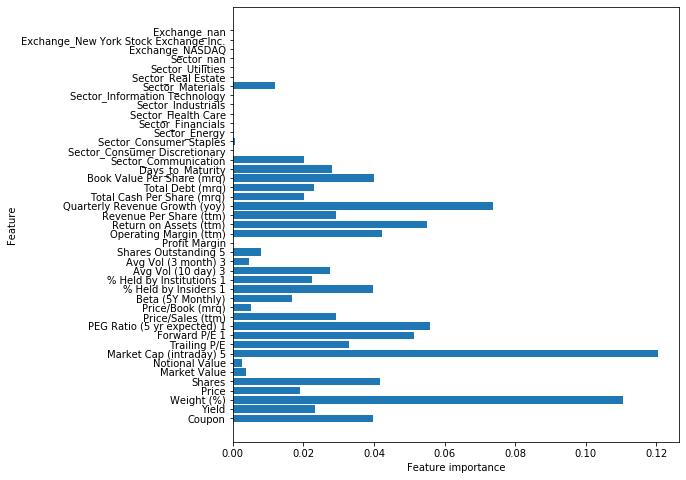

In [43]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10) 
tree_clf.fit(data_train, target_train)

tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [44]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 45  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 74  0  0  0  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  7  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  0 93  3  0  0  2]
 [ 0  1  9  0  0  0  0  0  3  0  0  0 53  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6 26  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  0  0  0  1  0  2  0  0  6  5  0  1 17]]
              precision    recall  f1-score   support

          A1       0.98      1.00      0.99        44
          A2       0.88      0.98      0.93        46
          A3       0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [45]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 86.09%


In [46]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [47]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [48]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.7597968069666183

In [49]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.7

In [50]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=10), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [51]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.9658925979680697

In [52]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.8695652173913043

In [53]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [54]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.7460087082728593

In [55]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.6869565217391305

In [56]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=10), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
   

In [57]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.9811320754716981

In [58]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.8804347826086957

In [59]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
# Training accuracy score
forest.score(data_train, target_train)

0.7387518142235123

In [61]:
# Test accuracy score
forest.score(data_test, target_test)

0.6826086956521739

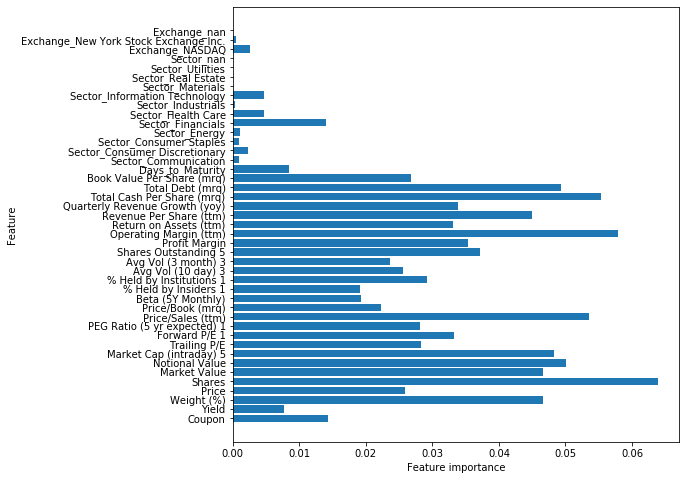

In [62]:
plot_feature_importances(forest)

In [63]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
forest_2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

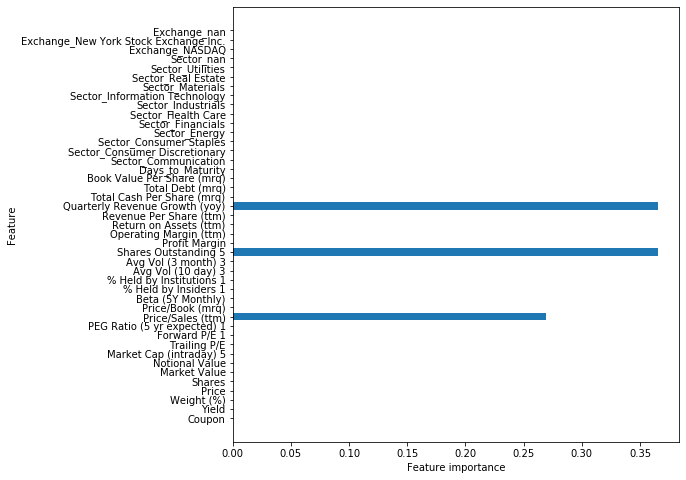

In [66]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [67]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

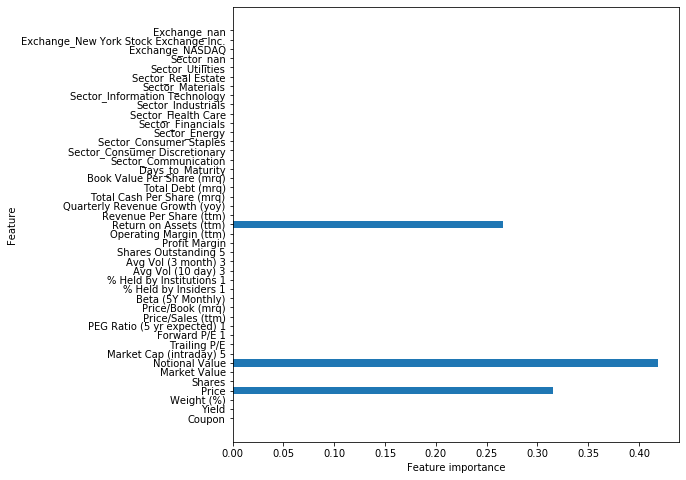

In [68]:
# Feature importance
plot_feature_importances(rf_tree_2)

In [69]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Sector,Exchange,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,3.250,3.580000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1858.0
1,4.000,3.440000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,9740.0
2,6.450,2.411028,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,7488.0
3,3.625,2.130000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,1736.0
4,2.875,2.480000,A3,0.12,52.81,543134.0,28682906.54,28682906.54,Financials,New York Stock Exchange Inc.,37.47,11.64,11.09,4.28,1.68,1.29,0.64,7.69,64.15,2.24,2.91,726.79,14.81,19.93,1.90,30.05,9.3,45.032679,6.57,39.85,2435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,3.450,2.460000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,1630.0
1834,2.600,2.270000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,882.0
1835,4.000,4.160000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,8187.0
1836,2.875,2.060000,Baa1,0.09,38.14,575844.0,21962690.16,21962690.16,Consumer Discretionary,NASDAQ,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.31,12.72,-1.9,3.550000,8.42,3.61,534.0


In [70]:
d_train, d_test, t_train, t_test = train_test_split(X, y, 
                                                                    test_size = 0.25, random_state=1234)

In [71]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 75, max_features= 15, max_depth= 7)
forest_2.fit(d_test, t_test)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
# forest_2.score(d_train, t_train)

In [73]:
forest_2.score(d_test, t_test)

0.9152173913043479

In [74]:
rf_predictions = forest_2.predict(d_test)

In [75]:
pd.DataFrame(rf_predictions)

,0
0,Baa1
1,Baa3
2,WR
3,Baa1
4,Baa1
...,...
455,A3
456,Baa1
457,A2
458,Baa1


In [76]:
d_test

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
220,2.250,1.810000,0.25,181.25,325558.0,5.900739e+07,5.900739e+07,77.91,31.88,26.23,1.96,5.36,14.53,0.86,0.14,83.04,1.85,1.77,431.80,16.94,22.11,4.57,33.58,5.1,3.49,2.47,12.420000,214.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1107,5.327,3.690000,0.21,58.50,827592.0,4.841413e+07,4.841413e+07,65.76,19.20,10.52,-0.86,3.19,1.80,1.98,0.22,80.46,25.61,23.09,1.11,17.01,19.92,5.45,18.63,-35.0,6.83,6.20,32.940000,3280.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1519,4.500,3.020000,0.07,33.75,482492.0,1.628410e+07,1.628410e+07,20.67,6.06,7.36,0.93,2.26,1.45,1.22,0.32,100.28,6.59,5.45,615.90,41.03,56.74,3.54,13.63,-4.3,19.80,19.87,23.310000,1986.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
880,3.150,2.411028,0.06,37.31,373081.0,1.391965e+07,1.391965e+07,18.81,0.00,88.62,43.92,9.42,0.00,0.27,0.25,101.99,2.56,3.31,505.22,2.28,17.89,1.67,4.11,20.3,0.28,6.51,37.976615,899.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
78,3.375,1.460000,0.14,48.48,652097.0,3.161366e+07,3.161366e+07,43.38,13.32,9.48,0.16,0.89,0.67,1.07,0.12,94.16,7.38,4.57,869.95,6.83,12.41,0.75,55.90,-10.1,18.49,35.35,74.930000,183.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,5.900,5.340000,0.21,58.62,821743.0,4.817057e+07,4.817057e+07,63.66,9.20,16.40,-4.14,1.91,1.83,1.11,0.10,75.48,5.45,6.24,1.08,21.56,22.30,6.61,29.85,-21.4,9.46,15.83,32.240000,4627.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1437,3.375,2.510000,0.07,100.43,160361.0,1.610506e+07,1.610506e+07,31.57,29.71,25.70,3.75,3.06,3.89,0.49,0.14,95.07,1.10,1.06,319.14,10.42,17.25,5.01,32.08,1.8,0.16,8.99,25.470000,2831.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
923,3.250,1.950000,1.37,137.46,2333690.0,3.207890e+08,3.207890e+08,423.90,12.82,11.90,1.75,3.85,1.84,1.14,0.84,74.83,7.23,10.11,3.08,33.11,40.70,1.37,34.16,10.3,294.17,577.64,74.610000,952.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
73,2.700,2.050000,0.07,86.79,185385.0,1.608956e+07,1.608956e+07,21.10,26.36,24.79,5.75,3.67,2.62,0.24,0.49,77.37,1.51,1.54,246.03,13.96,23.31,3.02,23.42,-3.8,0.08,9.57,32.770000,275.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [77]:
rft_predictions = forest_2.predict(d_train)
pd.DataFrame(rft_predictions)

,0
0,Baa1
1,A3
2,Baa1
3,Baa1
4,A2
...,...
1373,Baa2
1374,Baa3
1375,A1
1376,Baa1


In [78]:
d_train

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity,Sector_Communication,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Utilities,Sector_nan,Exchange_NASDAQ,Exchange_New York Stock Exchange Inc.,Exchange_nan
1491,3.750,3.570000,0.34,89.28,883518.0,7.888049e+07,7.888049e+07,102.17,30.30,25.72,2.81,3.79,0.00,0.53,0.25,72.63,6.41,7.20,1.17,13.81,15.11,10.680000,22.37,7.0,2.650000,20.63,-5.26,10152.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
580,6.878,2.411028,0.55,78.79,1632863.0,1.286533e+08,1.286533e+08,165.03,9.71,8.35,0.71,2.50,0.94,1.77,0.22,78.64,9.26,11.71,2.11,29.37,36.18,1.010000,29.37,6.4,341.220000,460.15,82.90,28491.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1745,4.329,2.600000,0.77,58.51,3097266.0,1.812210e+08,1.812210e+08,240.87,12.52,11.33,3.29,1.83,3.92,0.45,0.03,68.84,15.19,12.34,4.14,14.61,23.18,6.860000,31.87,1.4,0.630000,133.14,14.84,3142.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1834,2.600,2.270000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,29.87,17.93,11.20,1.17,2.77,10.40,1.24,4.50,95.45,10.52,10.20,813.52,16.54,22.20,7.310000,12.72,-1.9,3.550000,8.42,3.61,882.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
894,5.700,3.030000,0.42,180.81,538111.0,9.729585e+07,9.729585e+07,128.80,21.43,18.88,2.67,3.51,6.93,1.15,0.15,76.77,2.44,2.56,712.60,16.73,20.44,8.060000,50.91,-2.4,14.620000,16.71,26.01,6239.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,4.030,3.400000,0.19,370.94,118441.0,4.393450e+07,4.393450e+07,60.58,27.34,13.77,1.50,1.79,6.88,0.79,0.49,84.05,786.94,920.99,167.64,6.64,8.77,4.710000,199.89,6.9,13.390000,15.45,52.54,10105.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1077,4.250,5.000000,0.05,263.48,47158.0,1.242519e+07,1.242519e+07,16.04,26.39,19.33,1.87,3.63,3.00,0.93,0.61,98.47,699.57,538.24,62.50,13.84,20.02,5.620000,70.72,7.2,0.340000,2.77,85.79,10166.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1318,4.450,3.090000,0.66,146.99,1047714.0,1.540035e+08,1.540035e+08,201.70,27.82,22.82,3.91,3.00,13.61,0.52,0.22,74.45,4.05,3.96,1.39,10.89,15.97,8.580000,48.01,5.7,4.130000,33.63,10.63,9556.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
723,3.800,2.440000,0.10,93.66,242044.0,2.266984e+07,2.266984e+07,31.49,33.95,26.21,4.91,3.69,2.55,0.26,0.40,85.55,1.34,1.90,330.00,10.66,21.46,5.495976,26.53,0.8,45.032679,15.65,37.44,1386.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


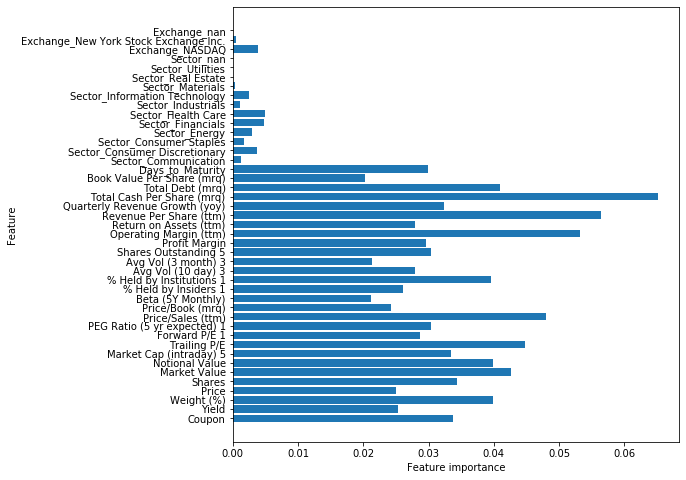

In [79]:
plot_feature_importances(forest_2)

In [80]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

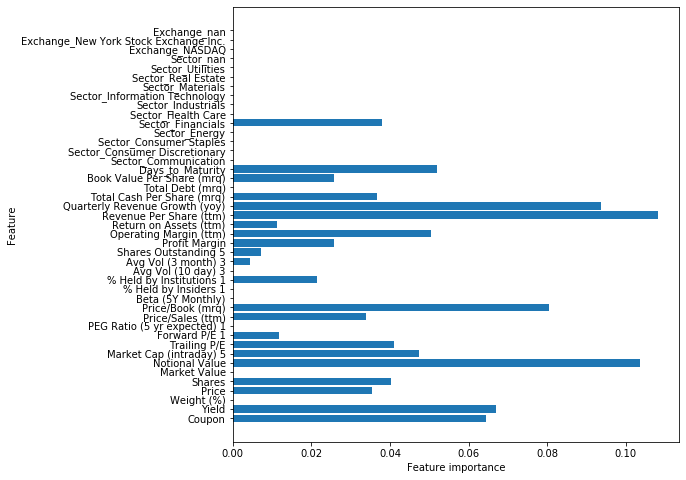

In [81]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [82]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

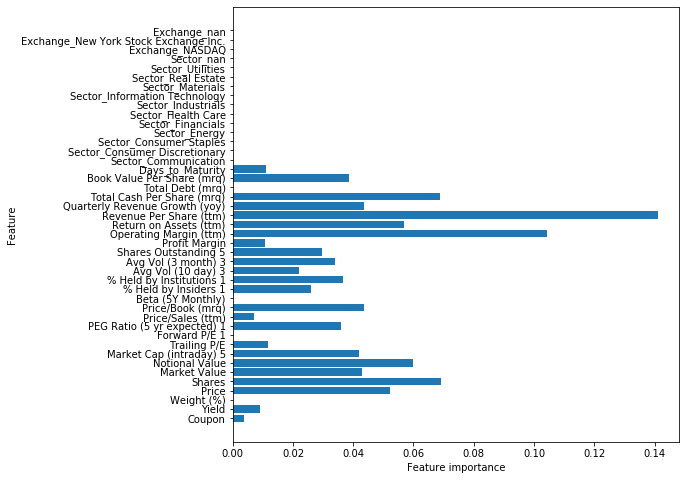

In [83]:
# Feature importance
plot_feature_importances(rf_tree_2)

In [84]:
# forest_2.pred

In [85]:
# predict.forest_2

In [86]:
mlist = list(mdf["Moody's Rating"].unique())

In [87]:
mlist

['A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'Ba3',
 'Aa1',
 'A1',
 'Aa3',
 'Ba1',
 'Baa3',
 'B2',
 'Aa2',
 'Aaa',
 'Ba2',
 'Caa1']

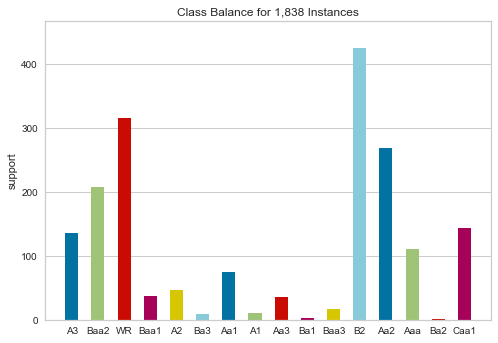

In [88]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
data_train, target_train = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=['A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'Ba3',
 'Aa1',
 'A1',
 'Aa3',
 'Ba1',
 'Baa3',
 'B2',
 'Aa2',
 'Aaa',
 'Ba2',
 'Caa1'])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

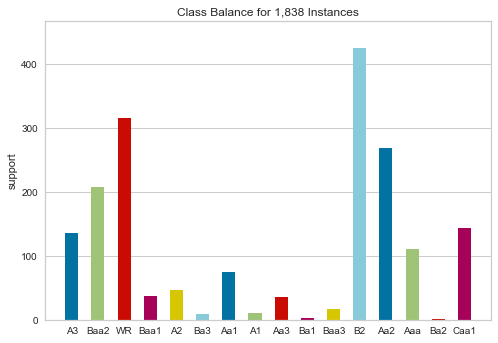

In [89]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
data_test, target_test = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=['A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'Ba3',
 'Aa1',
 'A1',
 'Aa3',
 'Ba1',
 'Baa3',
 'B2',
 'Aa2',
 'Aaa',
 'Ba2',
 'Caa1'])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure